In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#importing the dataset and the headers of the columns
diabetes_df = pd.read_csv("pima_indians_diabetes_dataset.csv", names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [3]:
#First 5 rows of dataset
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,,33,1


In [4]:
#Shape of dataset
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    int64 
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   Outcome                   768 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 54.1+ KB


In [6]:
#converting object type column to numeric
diabetes_df['Glucose'] = pd.to_numeric(diabetes_df['Glucose'],errors='coerce')
diabetes_df['BloodPressure'] = pd.to_numeric(diabetes_df['BloodPressure'],errors='coerce')
diabetes_df['SkinThickness'] = pd.to_numeric(diabetes_df['SkinThickness'],errors='coerce')
diabetes_df['Insulin'] = pd.to_numeric(diabetes_df['Insulin'],errors='coerce')
diabetes_df['BMI'] = pd.to_numeric(diabetes_df['BMI'],errors='coerce')
diabetes_df['DiabetesPedigreeFunction'] = pd.to_numeric(diabetes_df['DiabetesPedigreeFunction'],errors='coerce')
diabetes_df['Age'] = pd.to_numeric(diabetes_df['Age'],errors='coerce')

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   762 non-null    float64
 2   BloodPressure             766 non-null    float64
 3   SkinThickness             764 non-null    float64
 4   Insulin                   760 non-null    float64
 5   BMI                       760 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       764 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,762.000000,766.000000,764.000000,760.000000,760.000000,762.000000,764.000000,768.000000
mean,3.845052,120.795276,69.204961,20.460733,78.634211,31.982500,0.469514,33.218586,0.348958
std,3.369578,31.976298,19.217395,15.950358,114.308624,7.904179,0.325778,11.735647,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,22.500000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
#copying he data set to other data set to update 0 and NaN value, except Outcome column
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#showing the count of NaNs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                      11
BloodPressure                36
SkinThickness               231
Insulin                     382
BMI                          19
DiabetesPedigreeFunction      6
Age                           4
Outcome                       0
dtype: int64


In [11]:
#Filling the NaN values with mean or median
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
diabetes_df_copy['Age'].fillna(diabetes_df_copy['Age'].median(), inplace = True)
diabetes_df_copy['DiabetesPedigreeFunction'].fillna(diabetes_df_copy['DiabetesPedigreeFunction'].median(), inplace = True)

In [12]:
diabetes_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [13]:
#Importing Keras model and layers
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
#Seperating the dependent and independent variables
X = diabetes_df_copy.drop(['Outcome'], axis=1)
y = diabetes_df_copy['Outcome']

In [15]:
#Scalling the data
from sklearn.preprocessing import scale
X = scale(X)

In [16]:
#Importing train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
#One-Hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [18]:
#Builing the model
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [19]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
#Fitting the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
537/537 [==============================] - 0s 442us/step - loss: 0.6393 - accuracy: 0.6164
Epoch 2/150
537/537 [==============================] - 0s 145us/step - loss: 0.5764 - accuracy: 0.6918
Epoch 3/150
537/537 [==============================] - 0s 105us/step - loss: 0.5358 - accuracy: 0.7095
Epoch 4/150
537/537 [==============================] - 0s 108us/step - loss: 0.5080 - accuracy: 0.7486
Epoch 5/150
537/537 [==============================] - 0s 107us/step - loss: 0.4895 - accuracy: 0.7607
Epoch 6/150
537/537 [==============================] - 0s 99us/step - loss: 0.4745 - accuracy: 0.7709
Epoch 7/150
537/537 [==============================] - 0s 96us/step - loss: 0.4630 - accuracy: 0.7700
Epoch 8/150
537/537 [==============================] - 0s 111us/step - loss: 0.4551 - accuracy: 0.7756
Epoch 9/150
537/537 [==============================] - 0s 95us/step - loss: 0.4484 - accuracy: 0.7803
Epoch 10/150
537/537 [==============================] - 0s 109us/step - loss

In [21]:
#Checking the accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
accuracy_score(y_test, y_pred)

0.7575757575757576

Text(0, 0.5, 'loss')

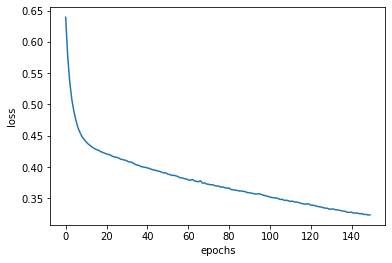

In [22]:
#Plotting the loss curve
plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0.5, 15.0, 'Predicted label')

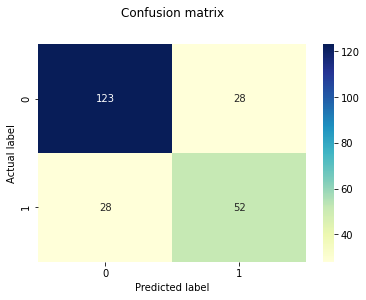

In [23]:
#graphing the confusion matrix
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [25]:
#plotting ROC Curve
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

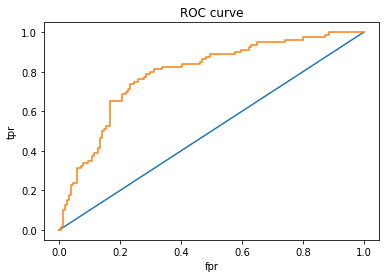

In [27]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()